In [1]:
!pip install matplotlib

In [3]:
import pandas as pd #database
import statsmodels.api as sm    #회귀분석
import matplotlib.pyplot as plt #시각화
import numpy as np  #선형대수학
from statsmodels.stats.outliers_influence import variance_inflation_factor  #VIF
import random

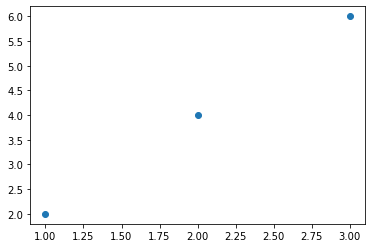

In [29]:
x = [1,2,3]
y = [2,4,6]
plt.scatter(x,y)

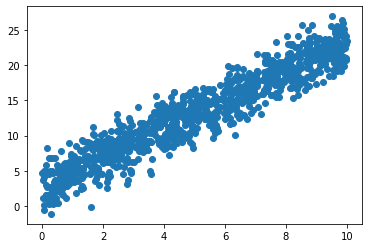

In [34]:
x = []
y = []
for i in range(1000):
    imsi = random.random() * 10
    x.append(imsi)
    y.append(2*imsi + 3 + random.gauss(0,2))
    # y.append(2*imsi + random.gauss(3,2)) -> y절편만큼 가우시안 분포의 평균을 이동시킴
    # 평균이 0이고 표준편차가 1인 가우시안 분포에서 임의의 난수 추출 -> 정규성을 만족시키기 위해 가우시안 분포에서 추출
    # 표준편차가 커지면 data 분포도가 커짐
plt.scatter(x,y)

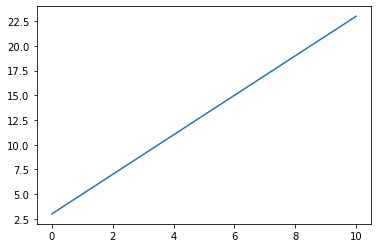

In [35]:
x1 = range(11)
y1 = [2*n+3 for n in range(11)]
plt.plot(x1, y1)

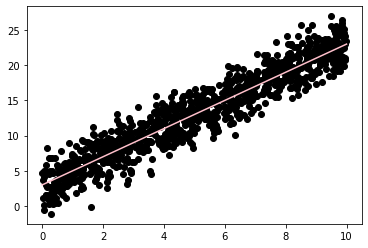

In [36]:
plt.scatter(x, y, c = "black")
plt.plot(x1, y1, c = "pink")
plt.show()

In [37]:
# 회귀분석
X = sm.add_constant(x)  # y절편 포함
model = sm.OLS(y, X)    # 기본적 회귀모형, sm.OLS(종속변수,독립변수)
result = model.fit()
print(result.summary())

# const = y절편
# x1 = 회귀계수(기울기)
# std err = 표준오차
# t = 기울기/표준오차

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     8928.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:09:30   Log-Likelihood:                -2099.6
No. Observations:                1000   AIC:                             4203.
Df Residuals:                     998   BIC:                             4213.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0067      0.124     24.229      0.0

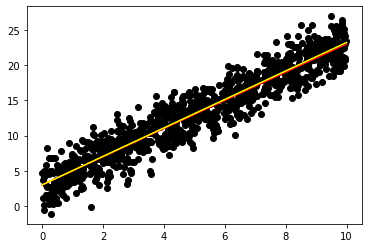

In [40]:
# 나온값이 실제 맞는지 비교
x2 = range(11)
y2 = [2.0224*n+3.0067 for n in range(11)]

plt.scatter(x, y, c = "black")
plt.plot(x1, y1, c = "red")
plt.plot(x2, y2, c = "yellow")
plt.show()

In [41]:
# mse 비교
score1 = 0  #임의로 선정한 결과를 담기위한 변수
score2 = 0  #회귀분석 결과를 담기위한 변수
for a, i in enumerate(x):
    score1 += (y[a] - (2*i+3))**2
    score2 += (y[a] - (2.0224*i+3.0067))**2
print(score1/len(x))
print(score2/len(x))

3.919659330335416
3.901228980683927


In [42]:
# 다중공선성
# x3_1이 x3과 다중공선성 문제가 생겨서 T값은 낮게, P값은 높게 나온다
x3 = []
x3_1 = []
y3 = []
for i in range(1000):
    imsi = random.random()*10
    x3.append(imsi)
    x3_1.append(imsi + random.gauss(0,1))
    y3.append(2*imsi + random.gauss(3,2))

df = {"x3": x3, "x3_1":x3_1, "y3":y3}
df = pd.DataFrame(df)

x3 = df[["x3","x3_1"]]
y3 = df["y3"]

x3 = sm.add_constant(x3, has_constant = "add")
model = sm.OLS(y3,x3)
result = model.fit()

print(result.summary())
# const = y절편
# x1 = 회귀계수(기울기)
# std err = 표준오차
# t = 기울기/표준오차

                            OLS Regression Results                            
Dep. Variable:                     y3   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     4168.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:21:19   Log-Likelihood:                -2097.9
No. Observations:                1000   AIC:                             4202.
Df Residuals:                     997   BIC:                             4217.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1489      0.125     25.272      0.0

In [43]:
# 연관성 확인
df.corrwith(df["x3"])

x3      1.000000
x3_1    0.945866
y3      0.945063
dtype: float64

In [44]:
df.corr()

,x3,x3_1,y3
x3,1.000000,0.945866,0.945063
x3_1,0.945866,1.000000,0.891870
y3,0.945063,0.891870,1.000000


In [45]:
# VIF 계산
# 10에 근사한 수가 나온 것만으로도 의심할 수 있음(10 근사치가 나왔을 때 독립변수 하나를 제거한 결과를 보고 판단해야 됨)
# 변수가 2개 뿐이여서 우연하게 R^2값이 비슷하게 나와서 그럼
for i in range(len(model.exog_names)):
    print(model.exog_names[i], variance_inflation_factor(model.exog, i))

const 3.9811024223628326
x3 9.493361317077316
x3_1 9.493361317077316
